In [1]:
# importing neccesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer


In [2]:
# Loading the dataset and viewing the first five rows
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# checking the dimension of the data
df.shape

(5110, 12)

In [4]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# checking for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###### There are 201 missing records in the bmi column

In [6]:
# dropping the id columns since it is not useful for analysis
df.drop("id", axis=1,)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Method 1
### Removing the missing records

In [7]:
# removing missing values
df.dropna(inplace = True)

In [8]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# converting categorical data to numerical
df = pd.get_dummies(df)

In [11]:
# creating the x and y variable
x = df.drop("stroke",axis=1)
y = df.stroke

In [12]:
x = x.iloc[:,:].values
y = y.values

In [13]:
# splitting the data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# using logistic regression on the train data
def logit_model(train_x,train_y,test_x,test_y):
    log_model = LogisticRegression()
    
    #fitting the models on our dataset
    log_model.fit(train_x,train_y)
    log_pred = log_model.predict(test_x)
    # evaluating models
    report = classification_report(test_y,log_pred)
    cm = confusion_matrix(test_y,log_pred)
    print(cm)
    print(report)
    
logit_model(x_train,y_train,x_test,y_test)

[[929   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



### Method 2 
#### Filling the misssing values with median

In [16]:
df2 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
# filling missing values with median
df2["bmi"] = df2["bmi"].fillna(df2["bmi"].median())

In [19]:
df2.drop("id", axis=1,)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
# encoding categorical features
df2 = pd.get_dummies(df2)

In [21]:
x1 = df2.drop("stroke",axis=1)
y1 = df2.stroke

In [22]:
x1 = x1.iloc[:,:].values
y1 = y1.values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
def logit_model(train_x,train_y,test_x,test_y):
    log_model = LogisticRegression()
    
    #fitting the models on our dataset
    log_model.fit(train_x,train_y)
    log_pred = log_model.predict(test_x)
    # evaluating models
    report = classification_report(test_y,log_pred)
    cm = confusion_matrix(test_y,log_pred)
    print(cm)
    print(report)
    
logit_model(x_train,y_train,x_test,y_test)

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#### Method 3 

#### Predicting missing values


In [26]:
df3 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# seperating the numerical features for training and predicting missing values
new_df = df3[["age","hypertension","heart_disease","avg_glucose_level","stroke","bmi"]]

In [28]:
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
0,67.0,0,1,228.69,1,36.6
1,61.0,0,0,202.21,1,NaN
2,80.0,0,1,105.92,1,32.5
3,49.0,0,0,171.23,1,34.4
4,79.0,1,0,174.12,1,24.0


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   stroke             5110 non-null   int64  
 5   bmi                4909 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [30]:
# creating a test set consisting of the missing values
test_set = new_df[new_df["bmi"].isnull()]
test_set

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
1,61.0,0,0,202.21,1,NaN
8,59.0,0,0,76.15,1,NaN
13,78.0,0,1,219.84,1,NaN
19,57.0,0,1,217.08,1,NaN
27,58.0,0,0,189.84,1,NaN
...,...,...,...,...,...,...
5039,41.0,0,0,70.15,0,NaN
5048,40.0,0,0,191.15,0,NaN
5093,45.0,1,0,95.02,0,NaN
5099,40.0,0,0,83.94,0,NaN


In [31]:
test_set.shape

(201, 6)

In [32]:
# creating the x_test 
X_test = test_set.drop("bmi", axis = 1)

In [33]:
# creating the train set
train_set = new_df.dropna()

In [34]:
X_train = train_set.drop("bmi",axis=1)
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1
5,81.0,0,0,186.21,1


In [35]:
# creating the y train
y_train = train_set["bmi"]
y_train

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [36]:
# Building a linear regressor to predict the missing valued
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [37]:
# predicting the missnig values
y_pred = LR_model.predict(X_test)

In [38]:
X_test["bmi"] = y_pred
X_test

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
1,61.0,0,0,202.21,1,30.773098
8,59.0,0,0,76.15,1,28.254702
13,78.0,0,1,219.84,1,30.868272
19,57.0,0,1,217.08,1,28.521808
27,58.0,0,0,189.84,1,30.219416
...,...,...,...,...,...,...
5039,41.0,0,0,70.15,0,28.039318
5048,40.0,0,0,191.15,0,30.137388
5093,45.0,1,0,95.02,0,31.010725
5099,40.0,0,0,83.94,0,28.181551


In [39]:
# combining the predicted values and the remaining values
df_final = pd.concat([train_set,X_test])

In [40]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
0,67.0,0,1,228.69,1,36.6
2,80.0,0,1,105.92,1,32.5
3,49.0,0,0,171.23,1,34.4
4,79.0,1,0,174.12,1,24.0
5,81.0,0,0,186.21,1,29.0


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5105
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   stroke             5110 non-null   int64  
 5   bmi                5110 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 279.5 KB


In [43]:
# combining all data together
df_final["gender"] = df3["gender"]
df_final["ever_married"] = df3["ever_married"]
df_final["work_type"] = df3["work_type"]
df_final["Residence_type"] = df3["Residence_type"]
df_final["smoking_status"] = df3["smoking_status"]

In [44]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,1,36.6,Male,Yes,Private,Urban,formerly smoked
2,80.0,0,1,105.92,1,32.5,Male,Yes,Private,Rural,never smoked
3,49.0,0,0,171.23,1,34.4,Female,Yes,Private,Urban,smokes
4,79.0,1,0,174.12,1,24.0,Female,Yes,Self-employed,Rural,never smoked
5,81.0,0,0,186.21,1,29.0,Male,Yes,Private,Urban,formerly smoked


In [45]:
df_final = pd.get_dummies(df_final)

In [46]:
x3 = df_final.drop("stroke",axis=1)
y3 = df_final.stroke

In [47]:
X = x3.iloc[:,:].values
y = y3.values

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
def logit_model(train_x,train_y,test_x,test_y):
    log_model = LogisticRegression()
    
    #fitting the models on our dataset
    log_model.fit(train_x,train_y)
    log_pred = log_model.predict(test_x)
    # evaluating models
    report = classification_report(test_y,log_pred)
    cm = confusion_matrix(test_y,log_pred)
    print(cm)
    print(report)
    
logit_model(x_train,y_train,x_test,y_test)

[[967   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       967
           1       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



#### Method 4 
#### using clustering (KNN Imputer)

In [71]:
df4 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df4.drop("id", axis=1,inplace=True)

In [73]:
# seperating numerical data for the KNN imputer
new_df2 = df4[["age","hypertension","heart_disease","avg_glucose_level","bmi"]]

In [74]:
# creating the KNN imputer model
impute_knn = KNNImputer(n_neighbors=4)
x = impute_knn.fit_transform(new_df2)

In [75]:
x

array([[ 67.   ,   0.   ,   1.   , 228.69 ,  36.6  ],
       [ 61.   ,   0.   ,   0.   , 202.21 ,  32.225],
       [ 80.   ,   0.   ,   1.   , 105.92 ,  32.5  ],
       ...,
       [ 35.   ,   0.   ,   0.   ,  82.99 ,  30.6  ],
       [ 51.   ,   0.   ,   0.   , 166.29 ,  25.6  ],
       [ 44.   ,   0.   ,   0.   ,  85.28 ,  26.2  ]])

In [80]:
clean_df = pd.DataFrame(x, columns= ["age","hypertension","heart_disease","avg_glucose_level","bmi"])

In [81]:
# combining all data together
clean_df["gender"] = df4["gender"]
clean_df["ever_married"] = df4["ever_married"]
clean_df["work_type"] = df4["work_type"]
clean_df["Residence_type"] = df4["Residence_type"]
clean_df["smoking_status"] = df4["smoking_status"]
clean_df["stroke"]  = df4["stroke"]

In [82]:
clean_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,0.0,1.0,228.69,36.600,Male,Yes,Private,Urban,formerly smoked,1
1,61.0,0.0,0.0,202.21,32.225,Female,Yes,Self-employed,Rural,never smoked,1
2,80.0,0.0,1.0,105.92,32.500,Male,Yes,Private,Rural,never smoked,1
3,49.0,0.0,0.0,171.23,34.400,Female,Yes,Private,Urban,smokes,1
4,79.0,1.0,0.0,174.12,24.000,Female,Yes,Self-employed,Rural,never smoked,1


In [83]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   float64
 2   heart_disease      5110 non-null   float64
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   gender             5110 non-null   object 
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [84]:
clean_df = pd.get_dummies(clean_df)

In [88]:
x4 = clean_df.drop("stroke", axis=1).values
y4 = clean_df["stroke"].values

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x4,y4,test_size=0.2,random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
def logit_model(train_x,train_y,test_x,test_y):
    log_model = LogisticRegression()
    
    #fitting the models on our dataset
    log_model.fit(train_x,train_y)
    log_pred = log_model.predict(test_x)
    # evaluating models
    report = classification_report(test_y,log_pred)
    cm = confusion_matrix(test_y,log_pred)
    print(cm)
    print(report)
    
logit_model(x_train,y_train,x_test,y_test)

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#### Method 5 
##### Using the Multivariate Imputation by chain equations (MICE)

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [96]:
df5 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df5.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [97]:
df5.drop("id",axis=1, inplace = True)

In [98]:
# seperating numerical and categorical variables
numerical = ["age", "hypertension","heart_disease","avg_glucose_level","bmi"]
categorical = ["gender","ever_married","work_type","Residence_type","smoking_status"]

In [99]:
# creatind a new dataframe of categorical and numericial variable
df_num = df5.loc[:,numerical]
df_cat = df5.loc[:, categorical]

In [100]:
imp = IterativeImputer(max_iter = 10, random_state =0)
imp.fit(df_num)

IterativeImputer(random_state=0)

In [101]:
df_num = imp.transform(df_num)
df_num = pd.DataFrame(df_num, columns = numerical)
df_num

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0.0,1.0,228.69,36.600000
1,61.0,0.0,0.0,202.21,32.454503
2,80.0,0.0,1.0,105.92,32.500000
3,49.0,0.0,0.0,171.23,34.400000
4,79.0,1.0,0.0,174.12,24.000000
...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,34.224653
5106,81.0,0.0,0.0,125.20,40.000000
5107,35.0,0.0,0.0,82.99,30.600000
5108,51.0,0.0,0.0,166.29,25.600000


In [102]:
new_df = df_num.join(df_cat)

In [103]:
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,228.69,36.600000,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,202.21,32.454503,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,105.92,32.500000,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,171.23,34.400000,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,174.12,24.000000,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,34.224653,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,125.20,40.000000,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,82.99,30.600000,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,166.29,25.600000,Male,Yes,Private,Rural,formerly smoked


In [104]:
new_df = pd.get_dummies(new_df)

In [105]:
x = new_df.iloc[:,:].values
y = df5.stroke.values

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
def logit_model(train_x,train_y,test_x,test_y):
    log_model = LogisticRegression()
    
    #fitting the models on our dataset
    log_model.fit(train_x,train_y)
    log_pred = log_model.predict(test_x)
    # evaluating models
    report = classification_report(test_y,log_pred)
    cm = confusion_matrix(test_y,log_pred)
    print(cm)
    print(report)
    
logit_model(x_train,y_train,x_test,y_test)

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [109]:
val = [[95,94,95,94,94]]
col = ["dropping_missing_values","filling_with_median", "Predictive_missing_values", "KNN_Imputer", "Iterative_Imputer"]

In [110]:
data = pd.DataFrame(val, columns = col)


In [111]:
data

,dropping_missing_values,filling_with_median,Predictive_missing_values,KNN_Imputer,Iterative_Imputer
0,95,94,95,94,94


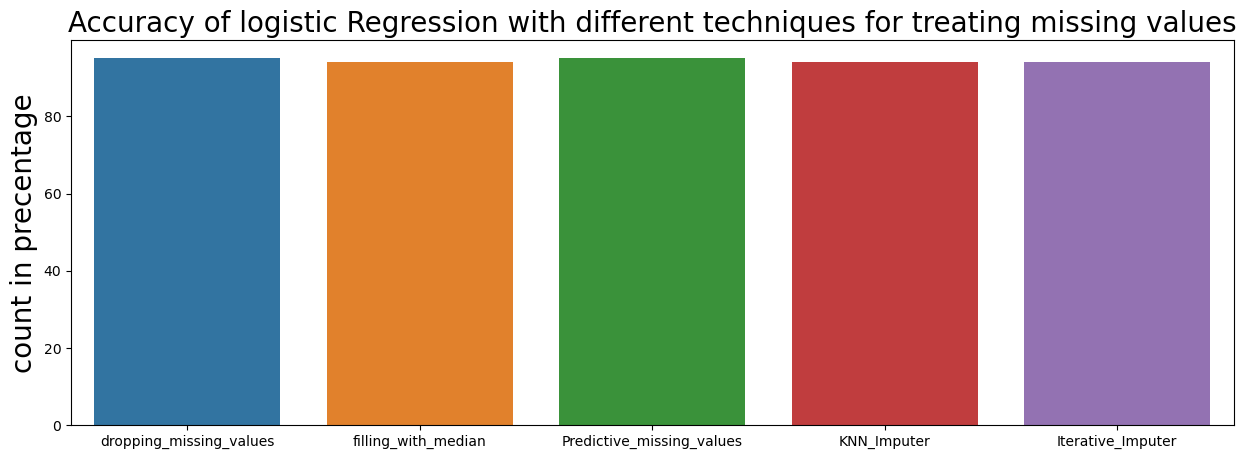

In [116]:
plt.figure(figsize=[15,5])
sns.barplot(data=data)
plt.ylabel("count in precentage",fontsize=20)
plt.title("Accuracy of logistic Regression with different techniques for treating missing values",fontsize=20)
plt.show()

In [117]:
plt.savefig("missing_values2")

<Figure size 640x480 with 0 Axes>